In [20]:
import torch
import numpy as np
import cv2
from torchvision import models, transforms
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from models import *
from utils import *
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image, \
    deprocess_image, \
    preprocess_image


In [21]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
s_i = vgg11_bn_f(False,100).to(device)
s_i.load_state_dict(torch.load('vgg11_cifar100_student.pth'))
t = vgg16_bn_f(False,100).to(device)
t.load_state_dict(torch.load('teacher_model_vgg16_bn.pth'))
s_lm = vgg11_bn_f(False,100).to(device)
s_lm.load_state_dict(torch.load('vgg11_cifar100_blm.pth'))
s_hint = vgg11_bn_f(False,100).to(device)
s_hint.load_state_dict(torch.load('vgg11_cifar100_hint_student.pth'))
s_crd = vgg11_bn_f(False,100).to(device)
s_crd.load_state_dict(torch.load('vgg11_cifar100_crd_student.pth'))

C:\Users\PCF\AppData\Local\Temp\ipykernel_9992\2524539570.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  s_i.load_state_dict(torch.load('vgg11_cifar100_student.pth'))
C

<All keys matched successfully>

In [22]:
print("Teacher Test Accuracy: ", eval_f(t, test_loader,nn.CrossEntropyLoss(),device)[1])
print("Independent Student Test Accuracy: ", eval_f(s_i, test_loader,nn.CrossEntropyLoss(),device)[1])
print("Basic Logit Matching Test Accuracy: ", eval_f(s_lm, test_loader,nn.CrossEntropyLoss(),device)[1])
print("Hint Test Accuracy: ", eval_f(s_hint, test_loader,nn.CrossEntropyLoss(),device)[1])
print("CRD Test Accuracy: ", eval_f(s_crd, test_loader,nn.CrossEntropyLoss(),device)[1])

Teacher Test Accuracy:  0.617
Independent Student Test Accuracy:  0.32009998
Basic Logit Matching Test Accuracy:  0.47959998
Hint Test Accuracy:  0.39
CRD Test Accuracy:  0.4204


In [23]:
t.eval()
from matplotlib import pyplot as plt

# Preprocess the input image
test = CIFAR100(root='./data', train=False, download=True)
idx = [11,12,13,14,16,25,28,36,37,45,58,73,83,96,98,109,120,122,138,141,147,150,160,162,166,170,179,183,201,132]
t_i_result = []
for i in idx:
    image = test[i][0]
    label = test[i][1]
    original_image = np.array(image)
    original_image = np.float32(original_image) / 255
    rgb_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    input_tensor = transform_test(rgb_image).unsqueeze(0)  # Add batch dimension

    # Choose the target class label
    target_label = label  # Replace with desired class index
    targets = [ClassifierOutputTarget(target_label)]
    target_layer = [t.block4[-1]]

    # Initialize Grad-CAM with the model and target layer
    cam = GradCAM(model=t, target_layers=target_layer)

    # Generate the Grad-CAM heatmap
    grayscale_cams = cam(input_tensor=input_tensor, targets=targets)
    cam_image = show_cam_on_image(original_image, grayscale_cams[0, :], use_rgb=True)  # First image in batch
    cam = np.uint8(255*grayscale_cams[0, :])
    cam = cv2.merge([cam, cam, cam])
    images = np.hstack((np.uint8(255*rgb_image), cam , cam_image))
    Image.fromarray(images)
    t_i_result.append(images)


Files already downloaded and verified


In [24]:
s_i.eval()
from matplotlib import pyplot as plt

# Preprocess the input image
test = CIFAR100(root='./data', train=False, download=True)
idx = [11,12,13,14,16,25,28,36,37,45,58,73,83,96,98,109,120,122,138,141,147,150,160,162,166,170,179,183,201,132]
s_i_result = []
for i in idx:
    image = test[i][0]
    label = test[i][1]
    original_image = np.array(image)
    original_image = np.float32(original_image) / 255
    rgb_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    input_tensor = transform_test(rgb_image).unsqueeze(0)  # Add batch dimension

    # Choose the target class label
    target_label = label  # Replace with desired class index
    targets = [ClassifierOutputTarget(target_label)]
    target_layer = [s_i.block4[-1]]

    # Initialize Grad-CAM with the model and target layer
    cam = GradCAM(model=s_i, target_layers=target_layer)

    # Generate the Grad-CAM heatmap
    grayscale_cams = cam(input_tensor=input_tensor, targets=targets)
    cam_image = show_cam_on_image(original_image, grayscale_cams[0, :], use_rgb=True)  # First image in batch
    cam = np.uint8(255*grayscale_cams[0, :])
    cam = cv2.merge([cam, cam, cam])
    images = np.hstack((np.uint8(255*rgb_image), cam , cam_image))
    Image.fromarray(images)
    s_i_result.append(images)

Files already downloaded and verified


In [25]:
s_lm.eval()
from matplotlib import pyplot as plt

# Preprocess the input image
test = CIFAR100(root='./data', train=False, download=True)
idx = [11,12,13,14,16,25,28,36,37,45,58,73,83,96,98,109,120,122,138,141,147,150,160,162,166,170,179,183,201,132]
s_lm_result = []
for i in idx:
    image = test[i][0]
    label = test[i][1]
    original_image = np.array(image)
    original_image = np.float32(original_image) / 255
    rgb_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    input_tensor = transform_test(rgb_image).unsqueeze(0)  # Add batch dimension

    # Choose the target class label
    target_label = label  # Replace with desired class index
    targets = [ClassifierOutputTarget(target_label)]
    target_layer = [s_lm.block4[-1]]

    # Initialize Grad-CAM with the model and target layer
    cam = GradCAM(model=s_lm, target_layers=target_layer)

    # Generate the Grad-CAM heatmap
    grayscale_cams = cam(input_tensor=input_tensor, targets=targets)
    cam_image = show_cam_on_image(original_image, grayscale_cams[0, :], use_rgb=True)  # First image in batch
    cam = np.uint8(255*grayscale_cams[0, :])
    cam = cv2.merge([cam, cam, cam])
    images = np.hstack((np.uint8(255*rgb_image), cam , cam_image))
    Image.fromarray(images)
    s_lm_result.append(images)

Files already downloaded and verified


In [26]:
s_hint.eval()
from matplotlib import pyplot as plt

# Preprocess the input image
test = CIFAR100(root='./data', train=False, download=True)
idx = [11,12,13,14,16,25,28,36,37,45,58,73,83,96,98,109,120,122,138,141,147,150,160,162,166,170,179,183,201,132]
s_hint_result = []
for i in idx:
    image = test[i][0]
    label = test[i][1]
    original_image = np.array(image)
    original_image = np.float32(original_image) / 255
    rgb_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    input_tensor = transform_test(rgb_image).unsqueeze(0)  # Add batch dimension

    # Choose the target class label
    target_label = label  # Replace with desired class index
    targets = [ClassifierOutputTarget(target_label)]
    target_layer = [s_hint.block4[-1]]

    # Initialize Grad-CAM with the model and target layer
    cam = GradCAM(model=s_hint, target_layers=target_layer)

    # Generate the Grad-CAM heatmap
    grayscale_cams = cam(input_tensor=input_tensor, targets=targets)
    cam_image = show_cam_on_image(original_image, grayscale_cams[0, :], use_rgb=True)  # First image in batch
    cam = np.uint8(255*grayscale_cams[0, :])
    cam = cv2.merge([cam, cam, cam])
    images = np.hstack((np.uint8(255*rgb_image), cam , cam_image))
    Image.fromarray(images)
    s_hint_result.append(images)

Files already downloaded and verified


In [27]:
s_crd.eval()
from matplotlib import pyplot as plt

# Preprocess the input image
test = CIFAR100(root='./data', train=False, download=True)
idx = [11,12,13,14,16,25,28,36,37,45,58,73,83,96,98,109,120,122,138,141,147,150,160,162,166,170,179,183,201,132]
s_crd_result = []
for i in idx:
    image = test[i][0]
    label = test[i][1]
    original_image = np.array(image)
    original_image = np.float32(original_image) / 255
    rgb_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    input_tensor = transform_test(rgb_image).unsqueeze(0)  # Add batch dimension

    # Choose the target class label
    target_label = label  # Replace with desired class index
    targets = [ClassifierOutputTarget(target_label)]
    target_layer = [s_crd.block4[-1]]

    # Initialize Grad-CAM with the model and target layer
    cam = GradCAM(model=s_crd, target_layers=target_layer)

    # Generate the Grad-CAM heatmap
    grayscale_cams = cam(input_tensor=input_tensor, targets=targets)
    cam_image = show_cam_on_image(original_image, grayscale_cams[0, :], use_rgb=True)  # First image in batch
    cam = np.uint8(255*grayscale_cams[0, :])
    cam = cv2.merge([cam, cam, cam])
    images = np.hstack((np.uint8(255*rgb_image), cam , cam_image))
    Image.fromarray(images)
    s_crd_result.append(images)

Files already downloaded and verified


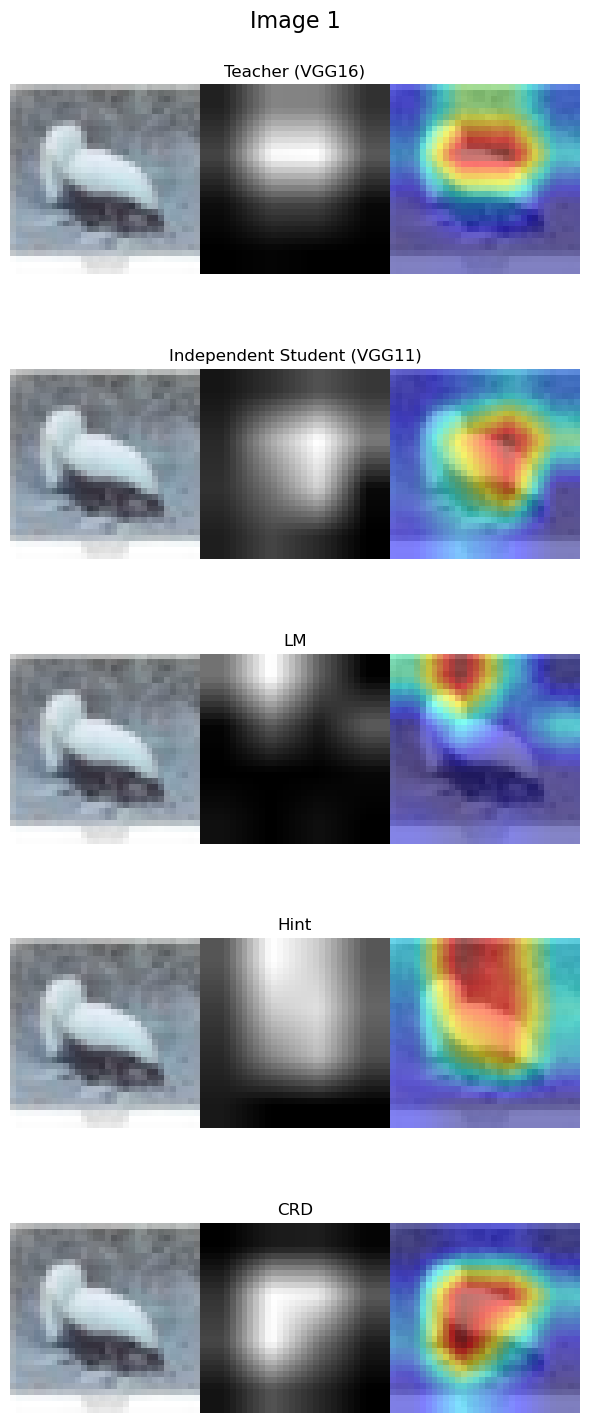

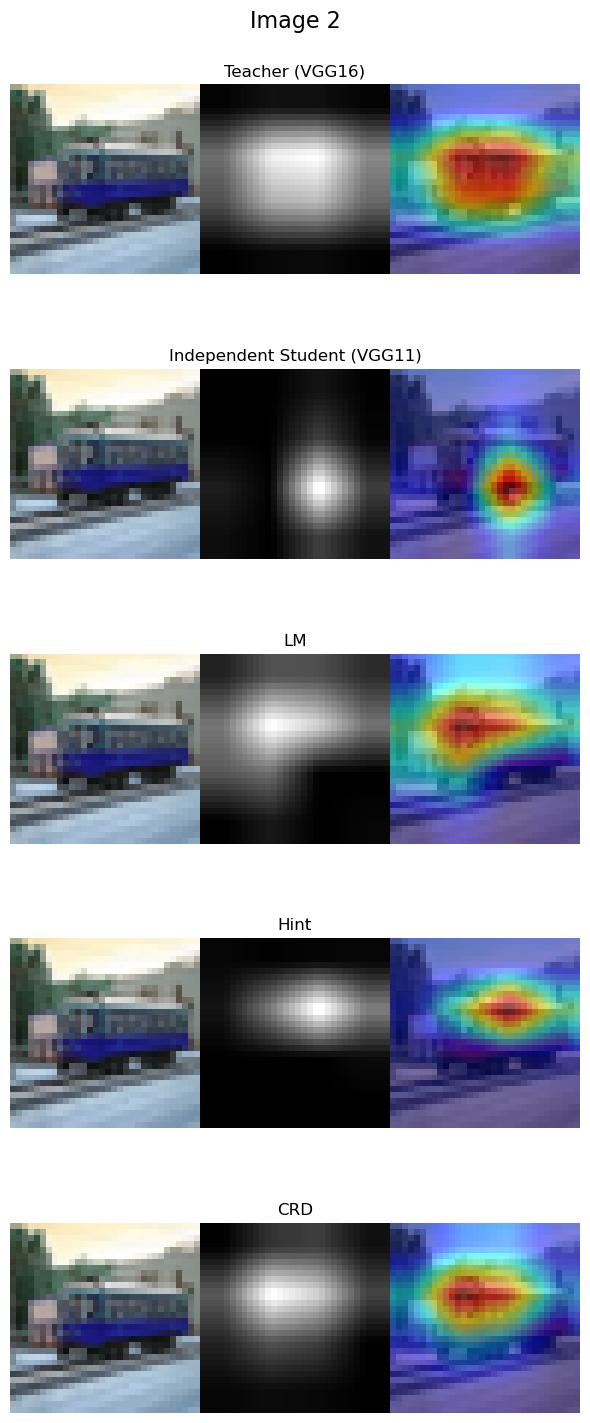

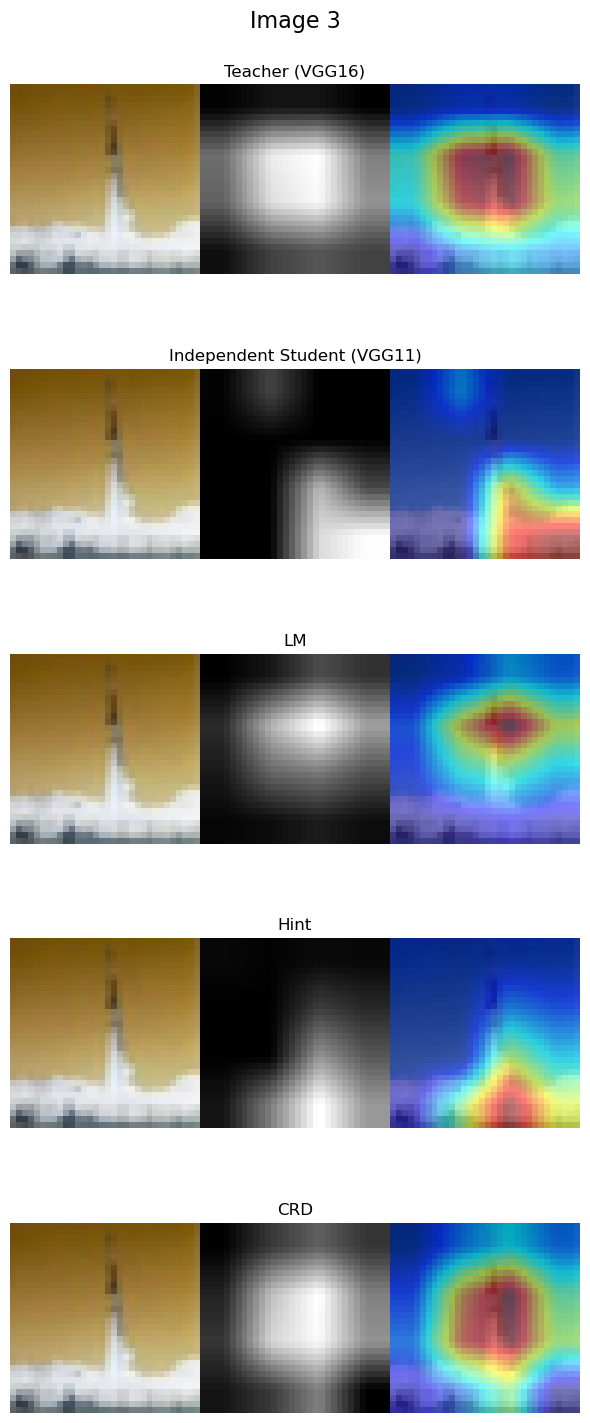

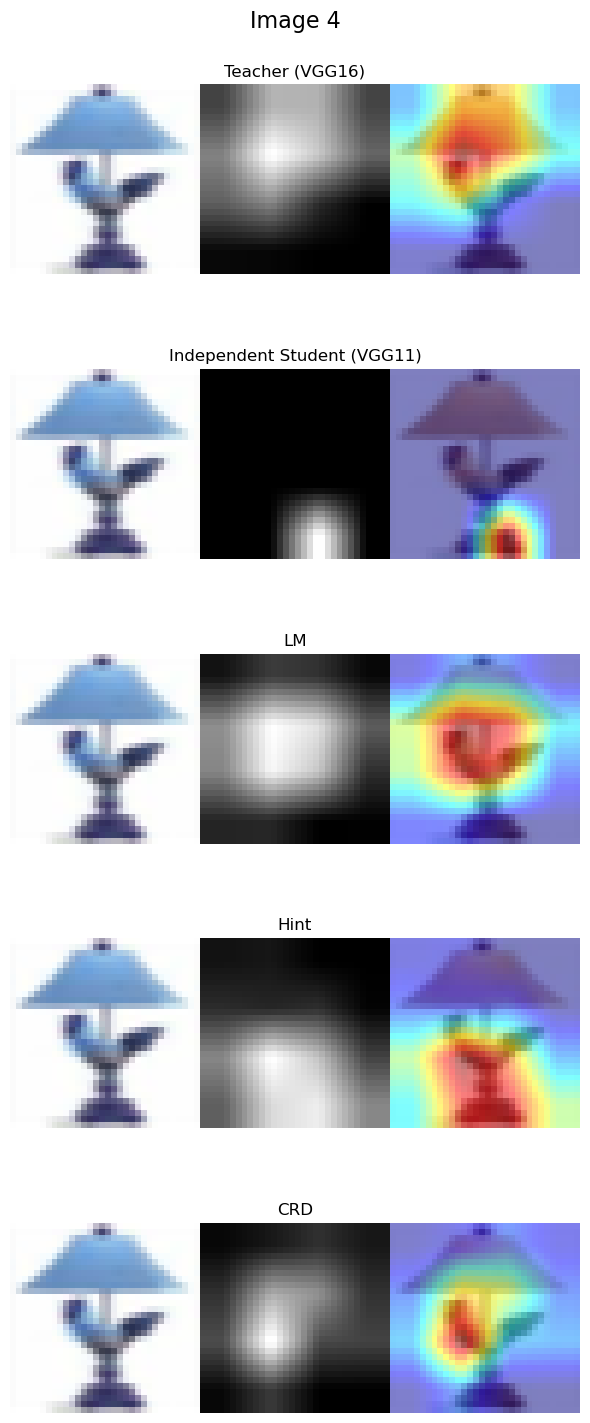

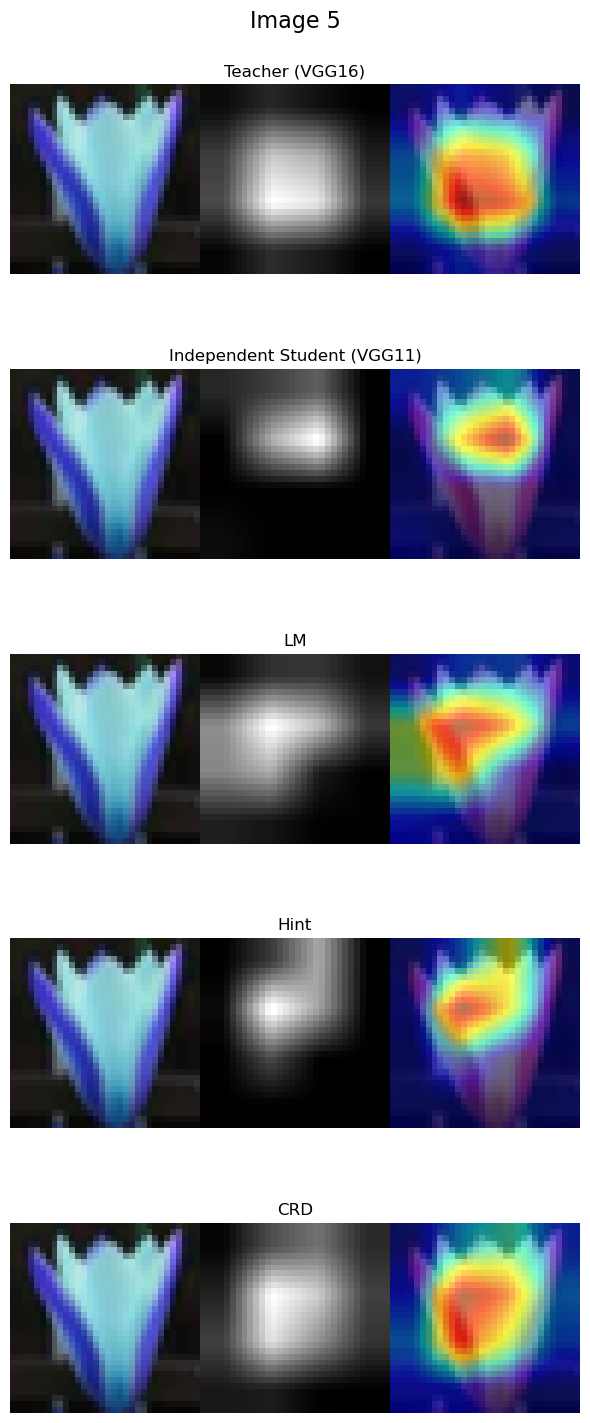

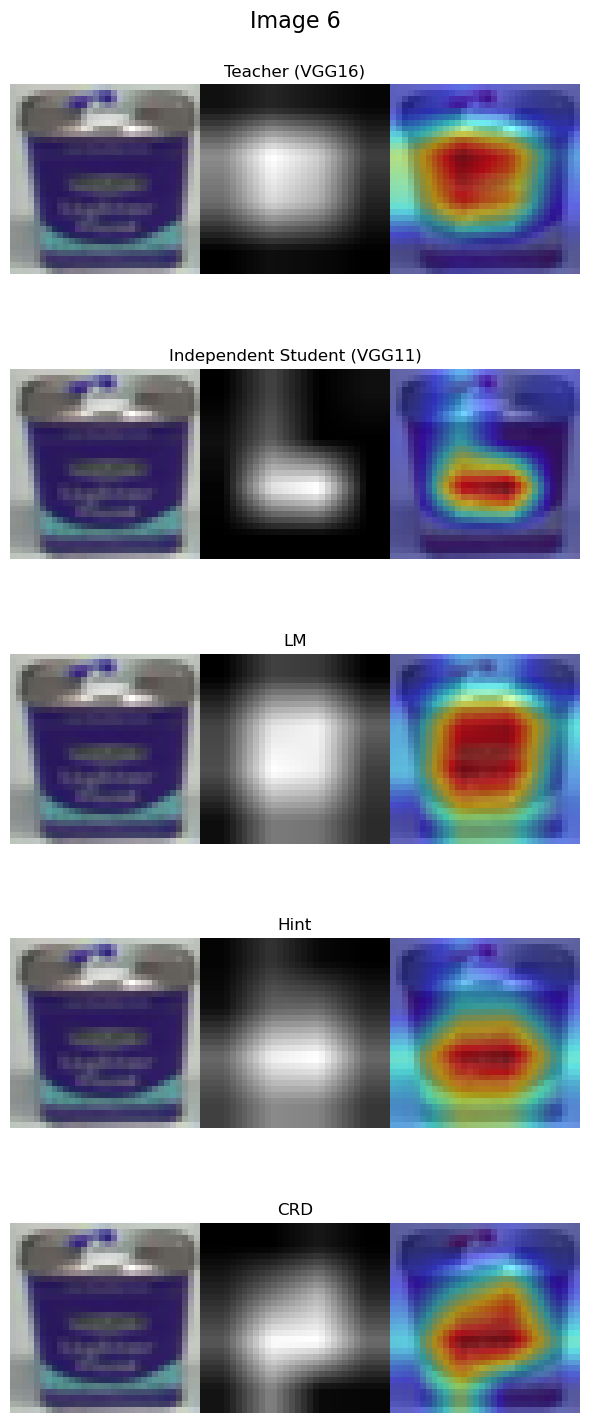

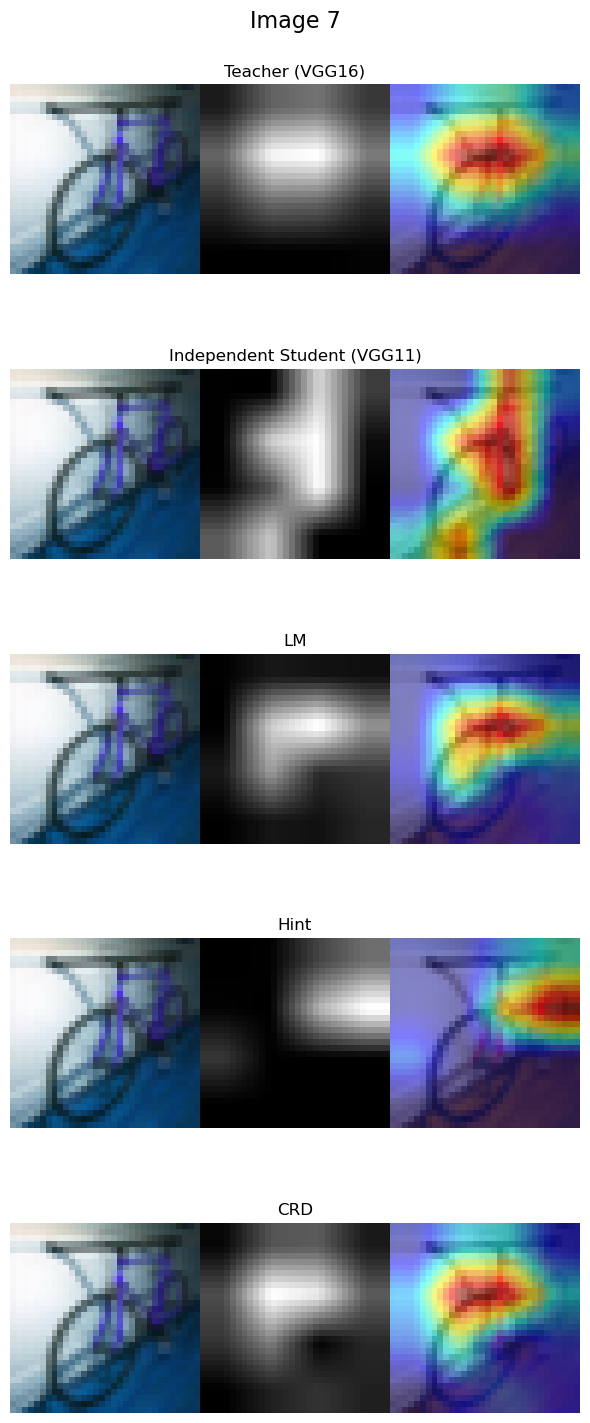

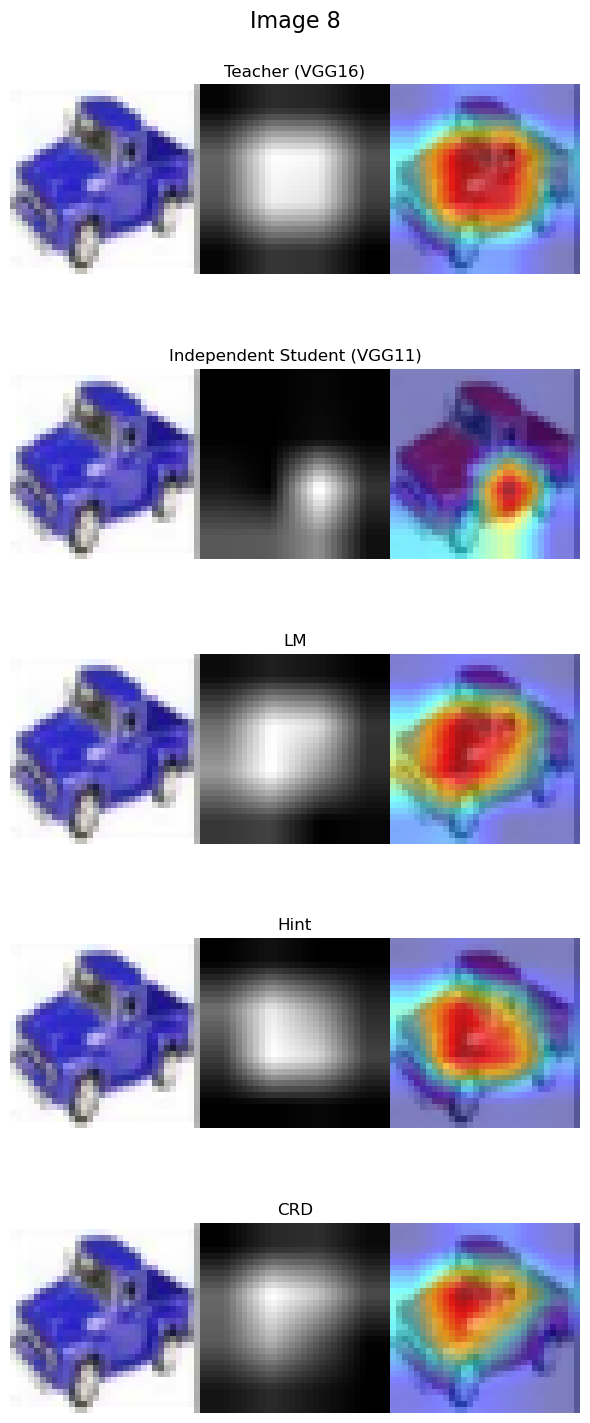

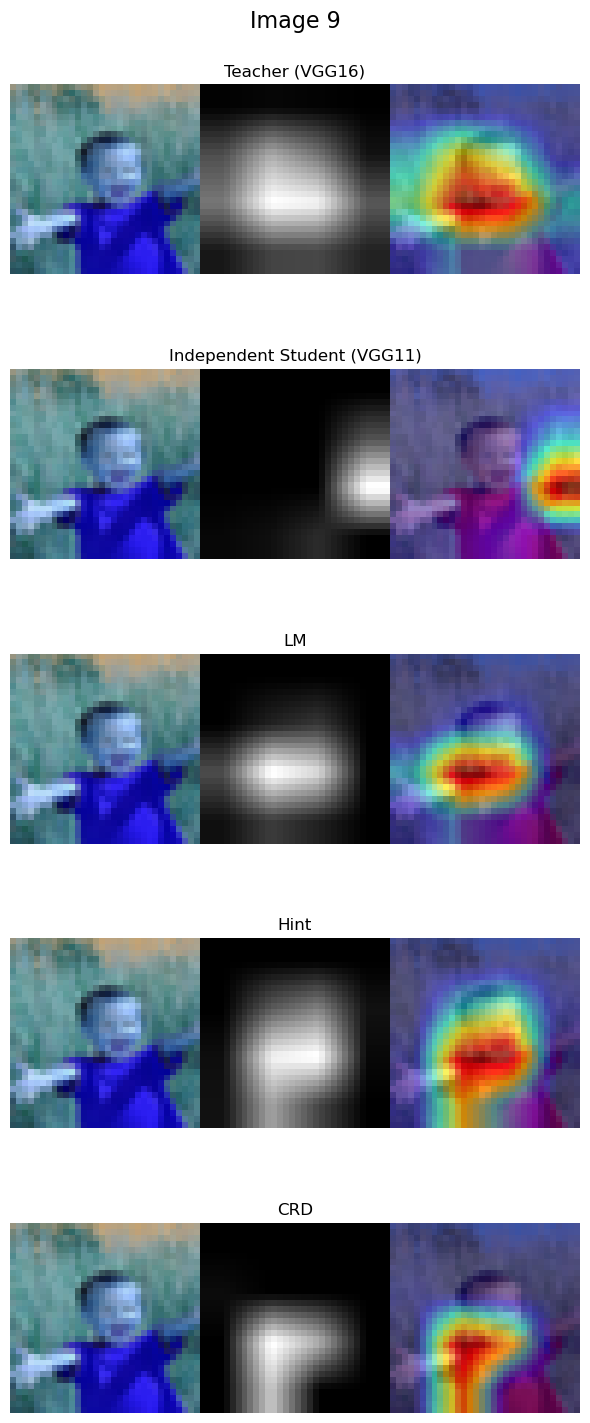

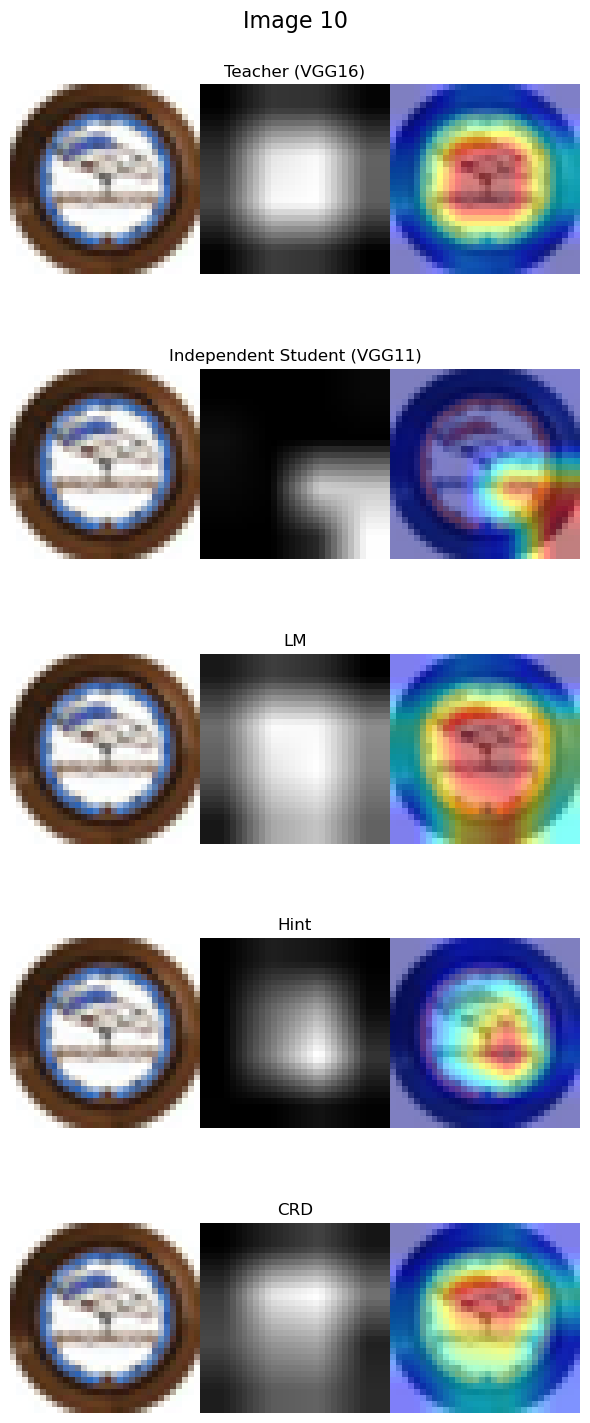

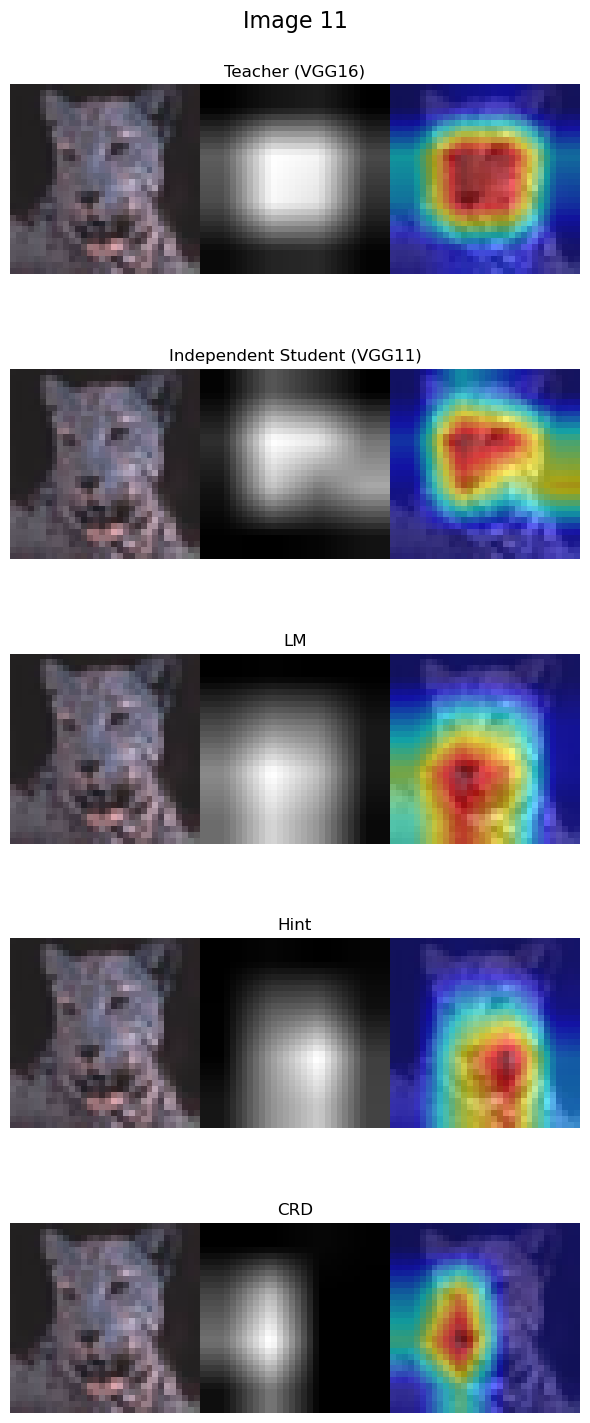

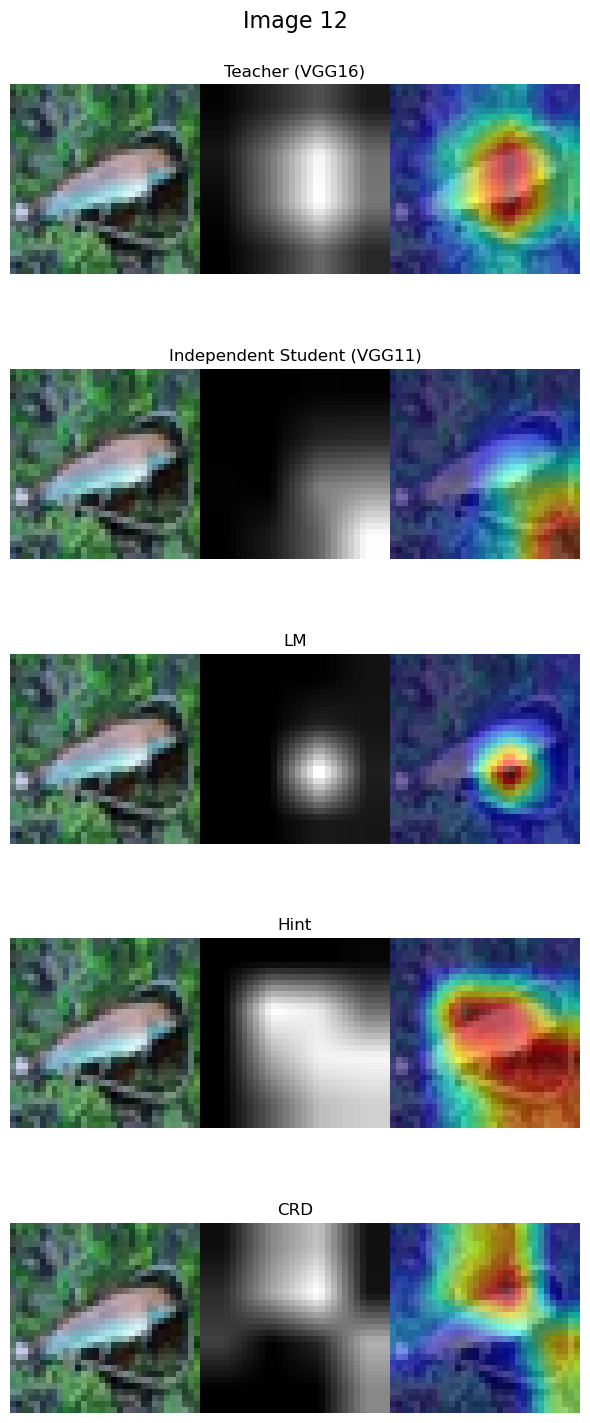

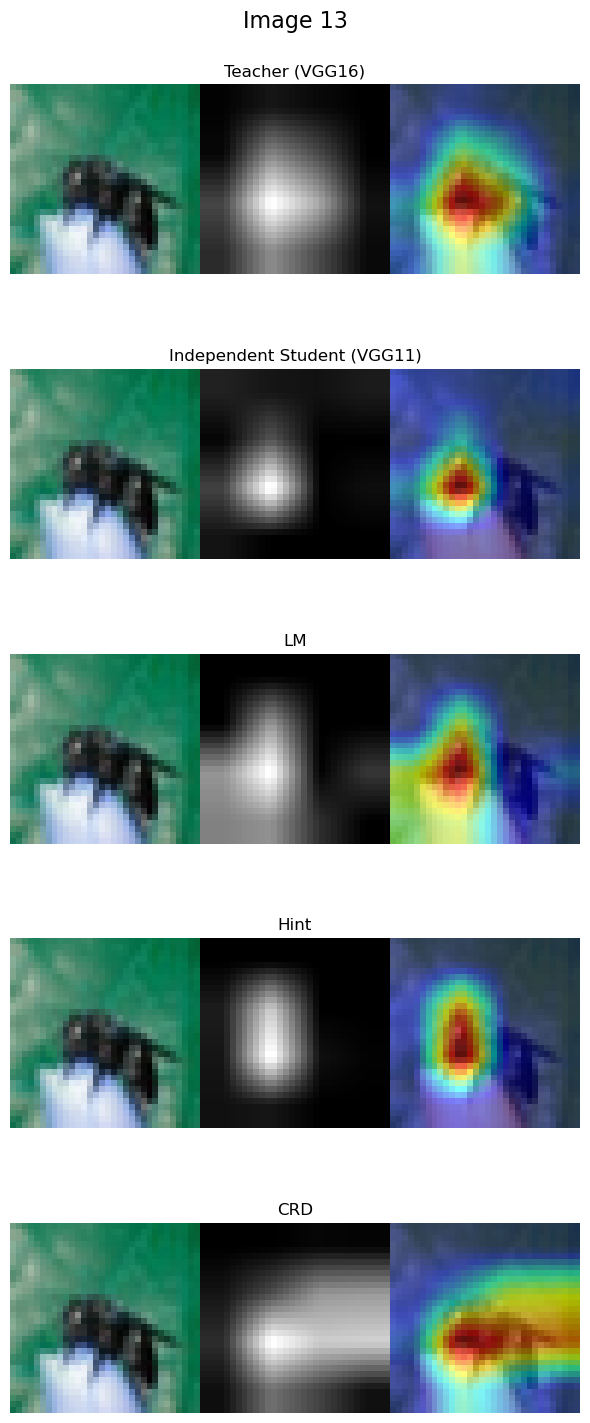

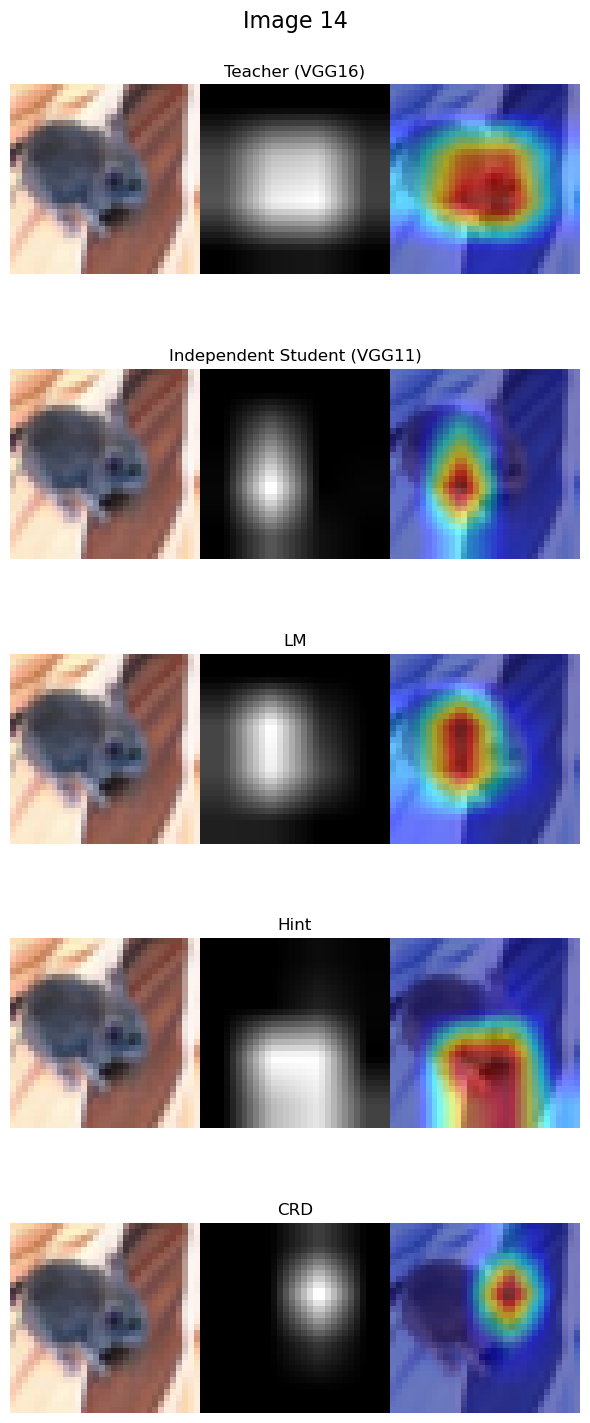

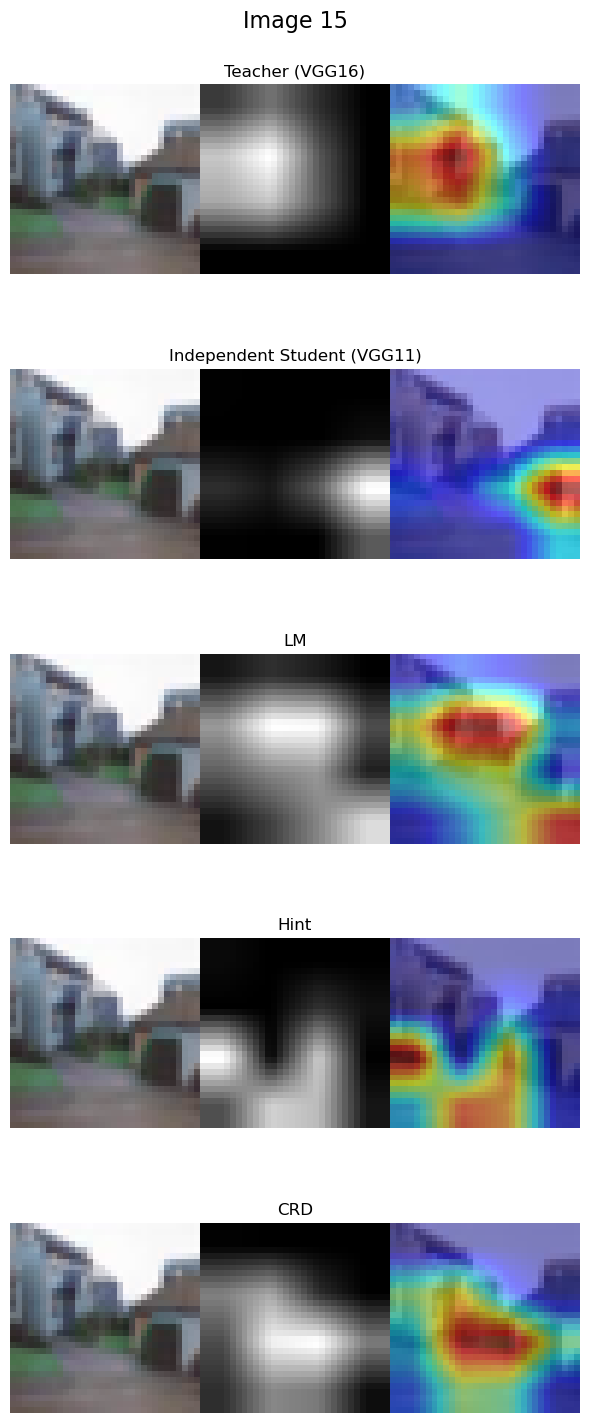

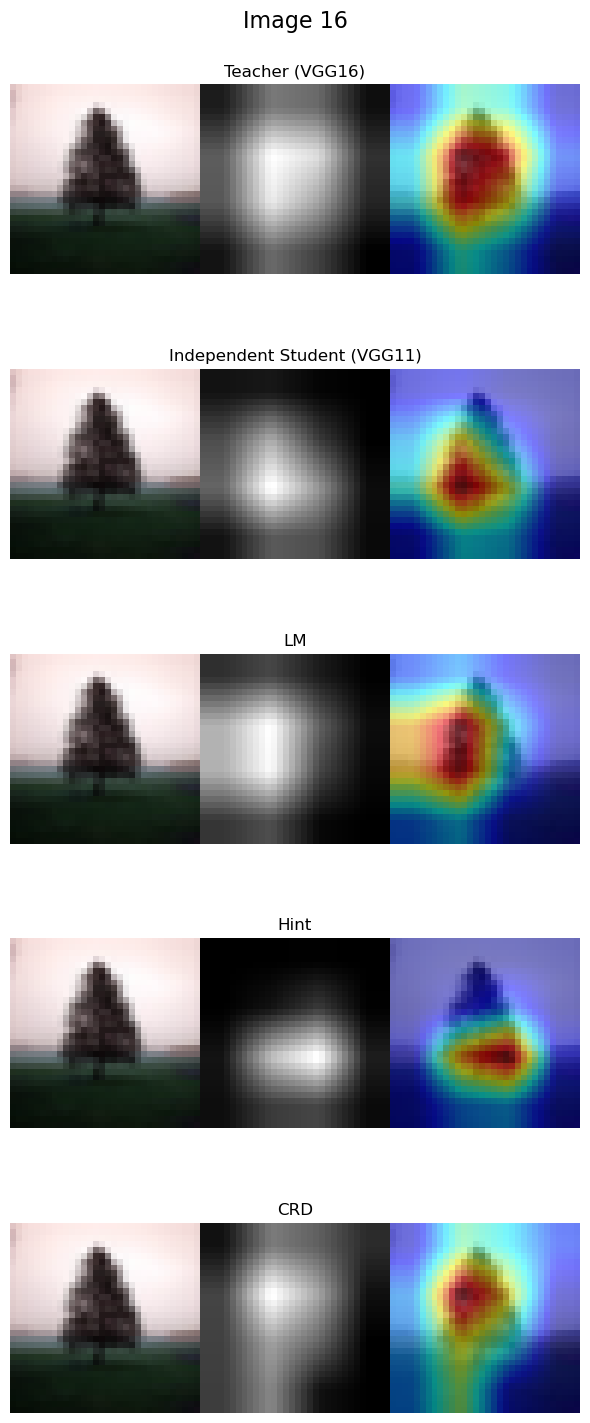

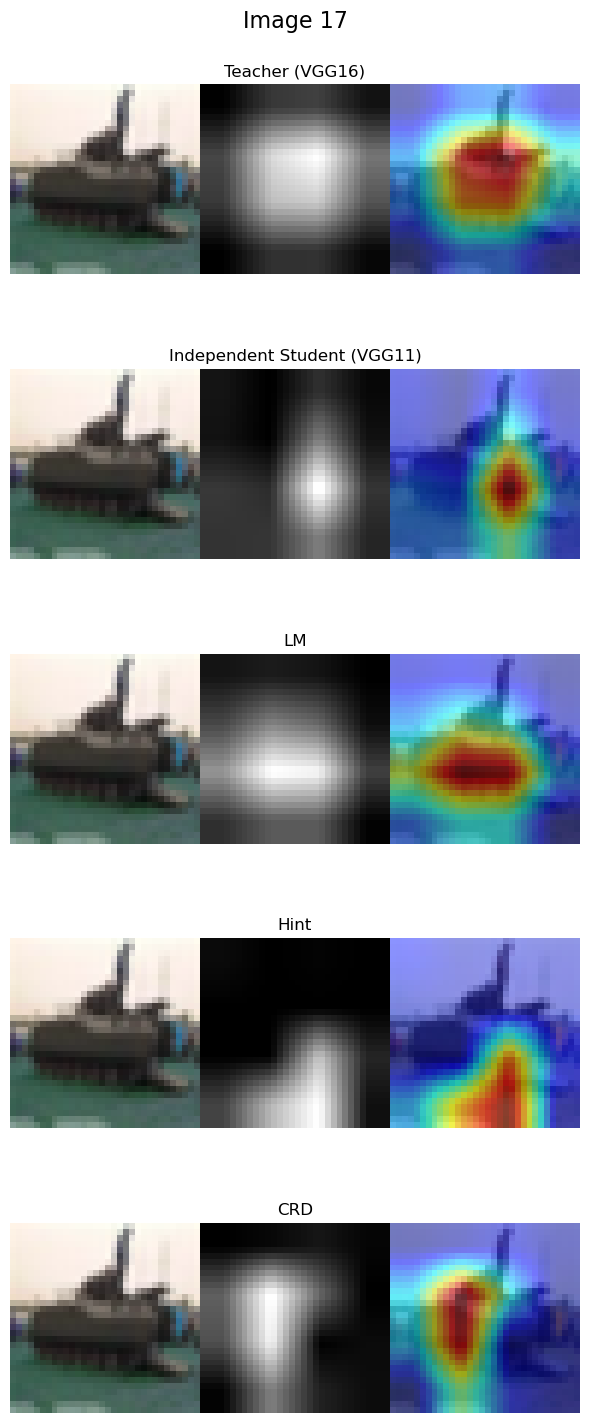

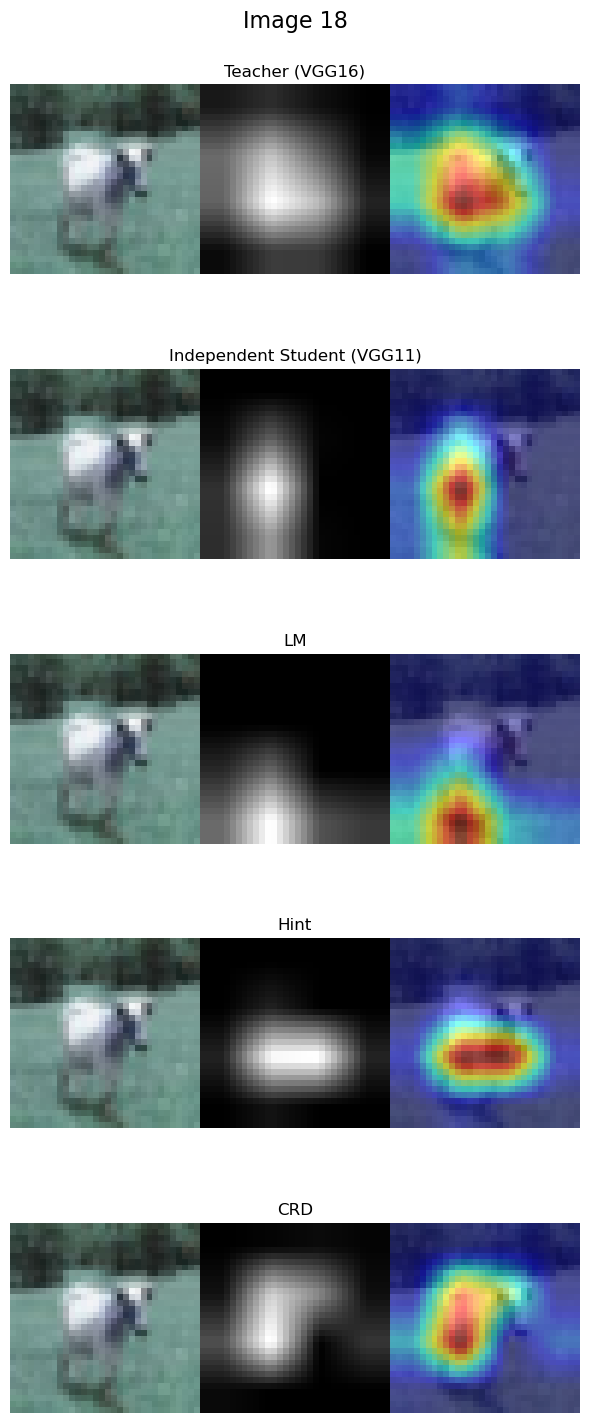

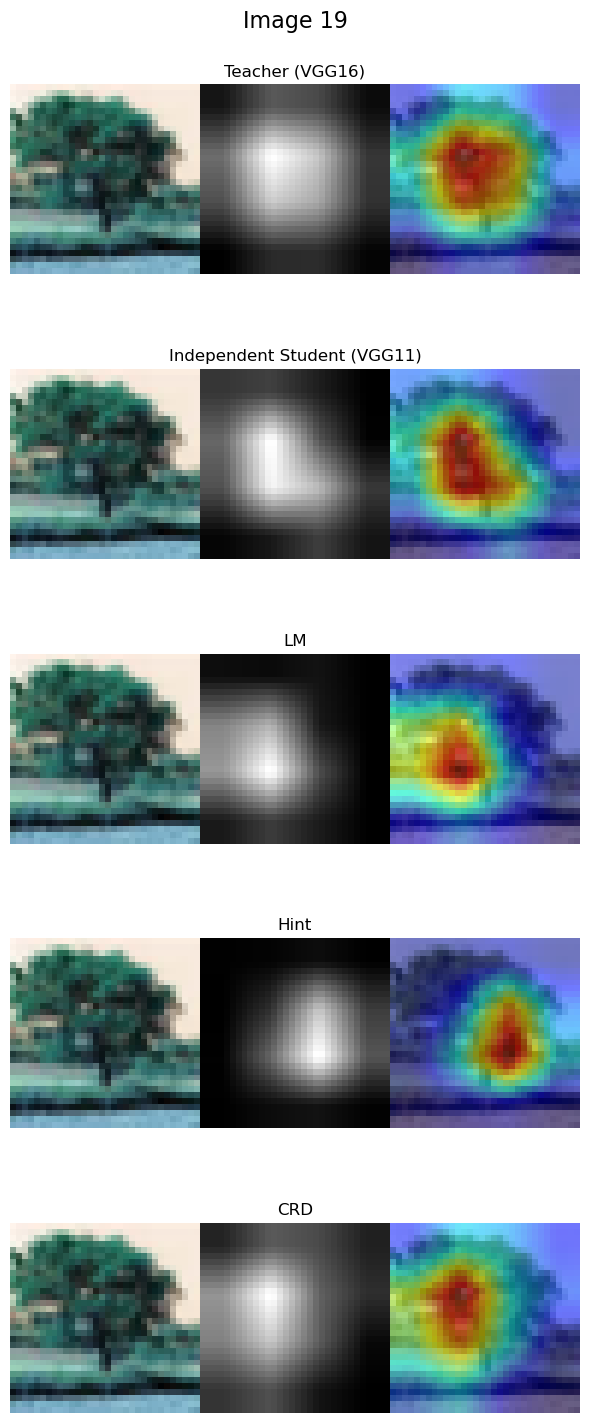

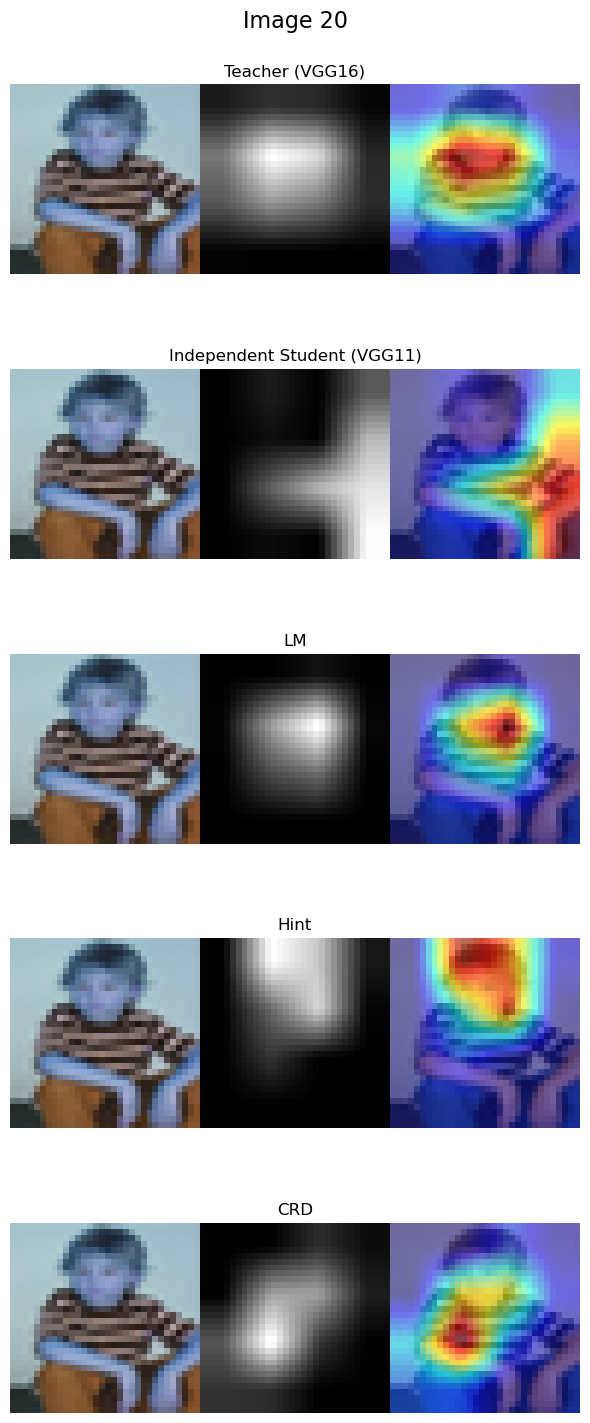

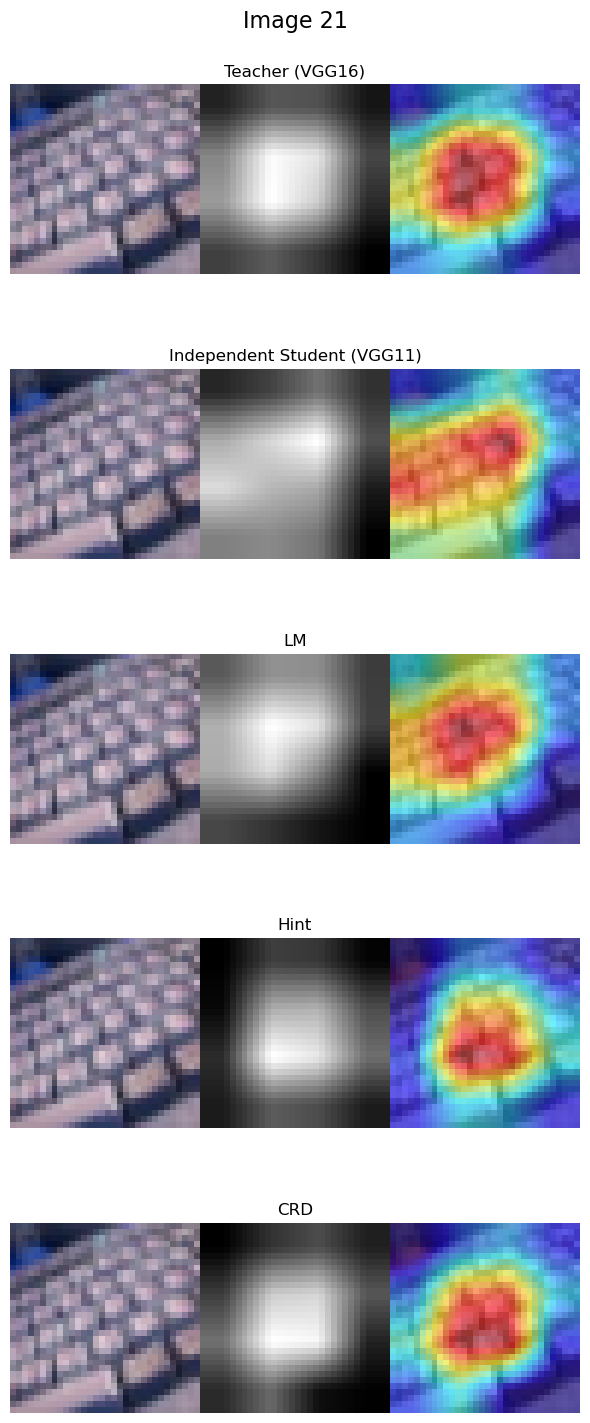

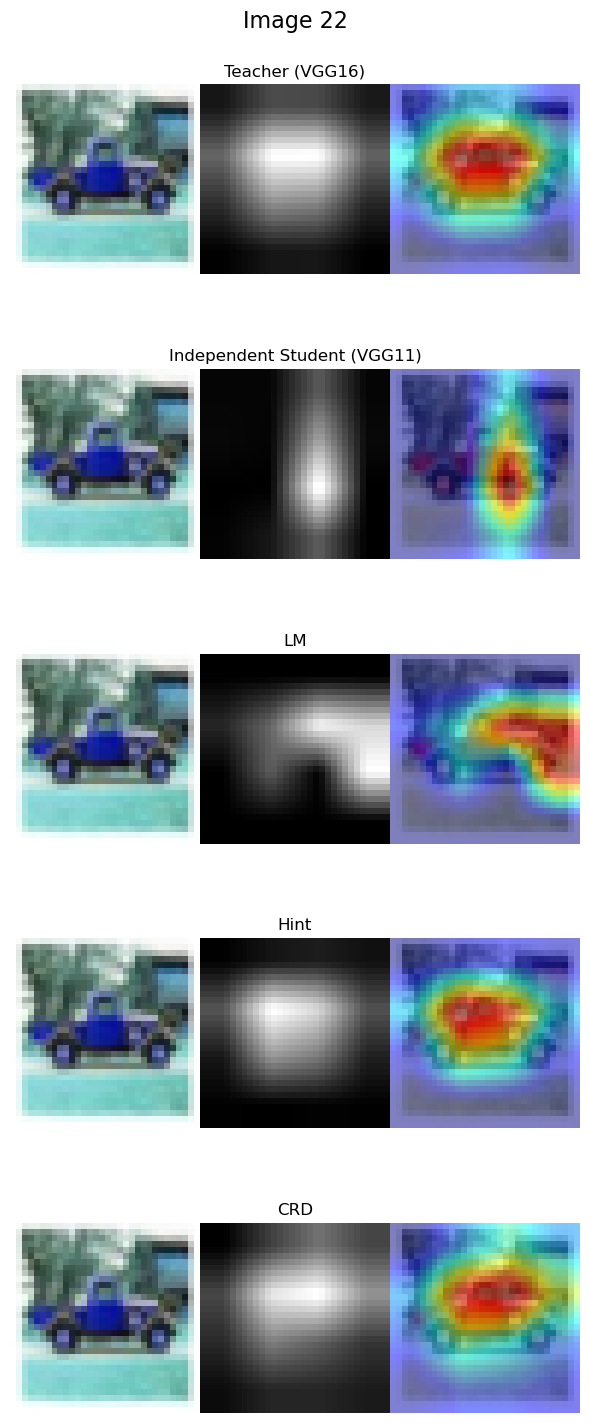

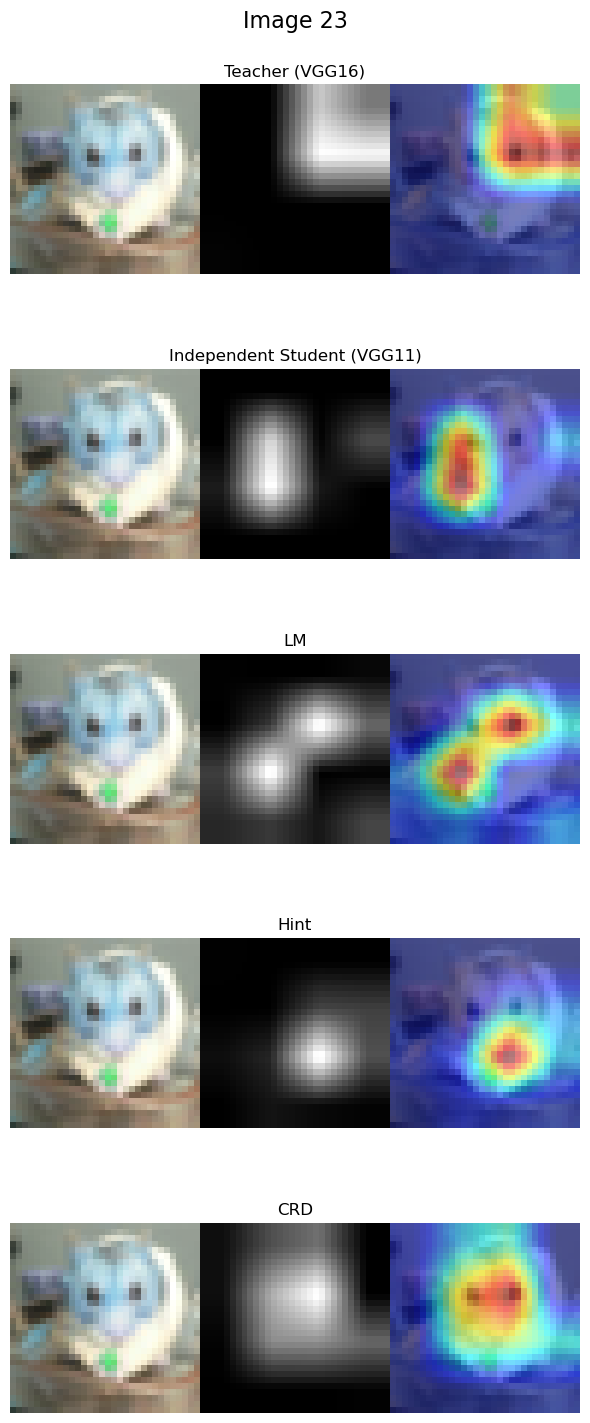

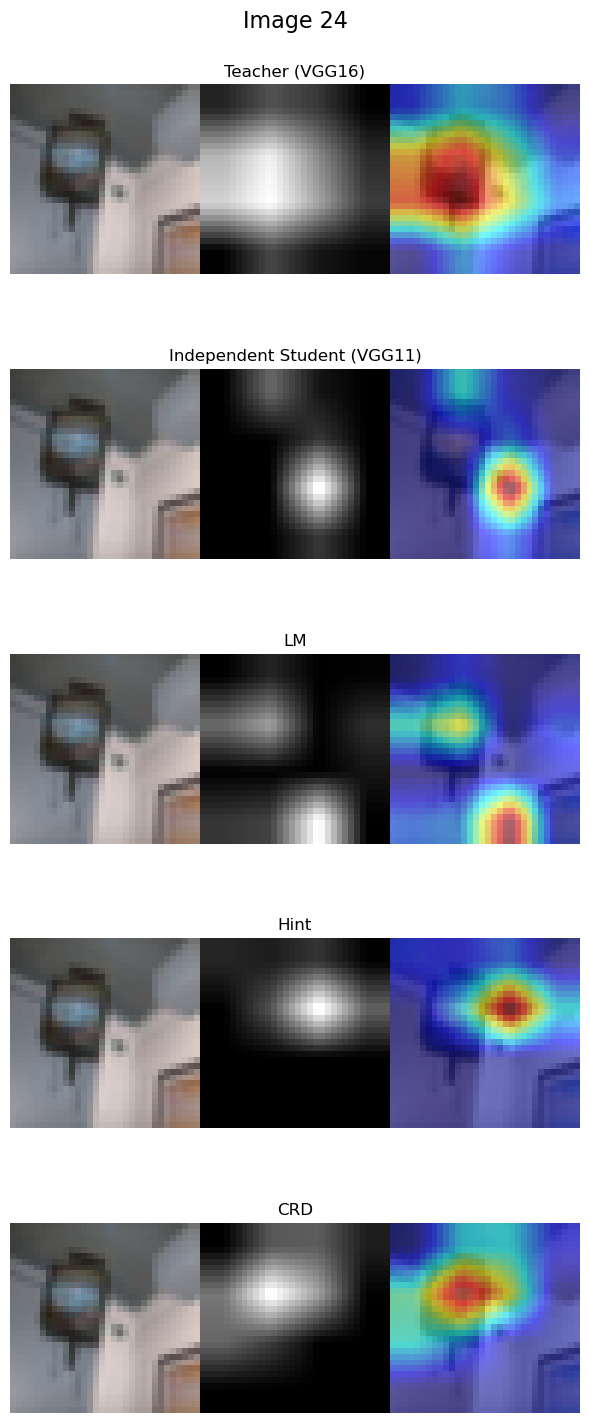

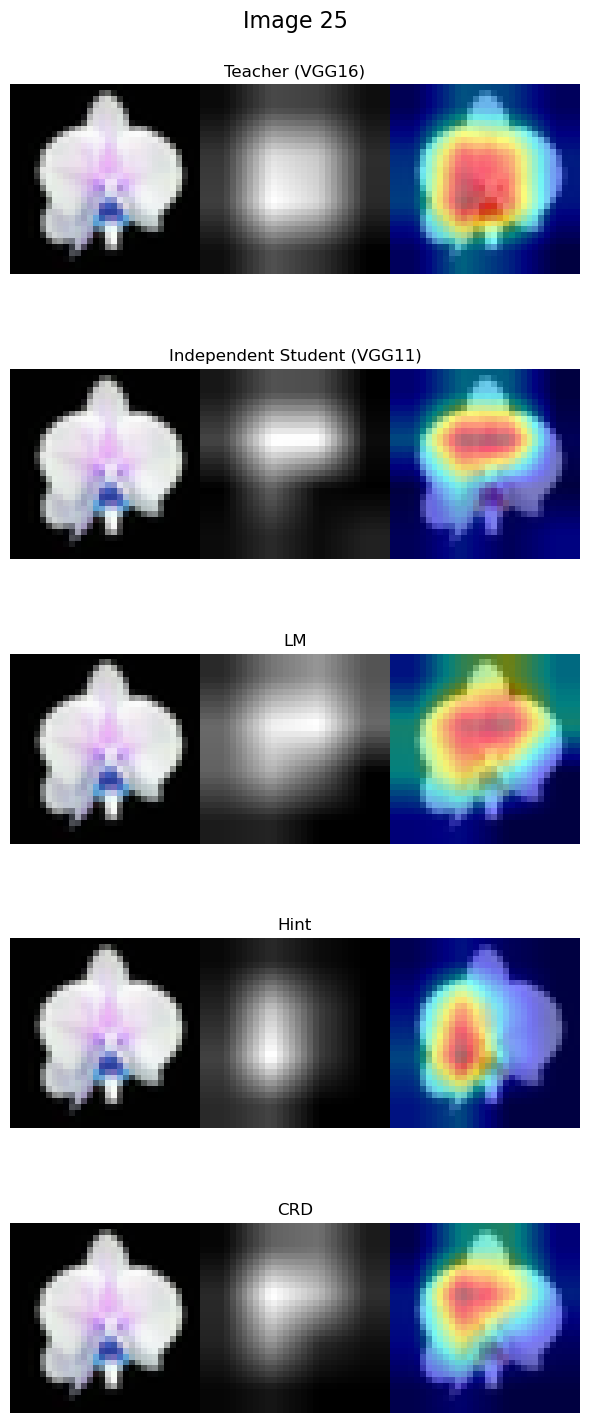

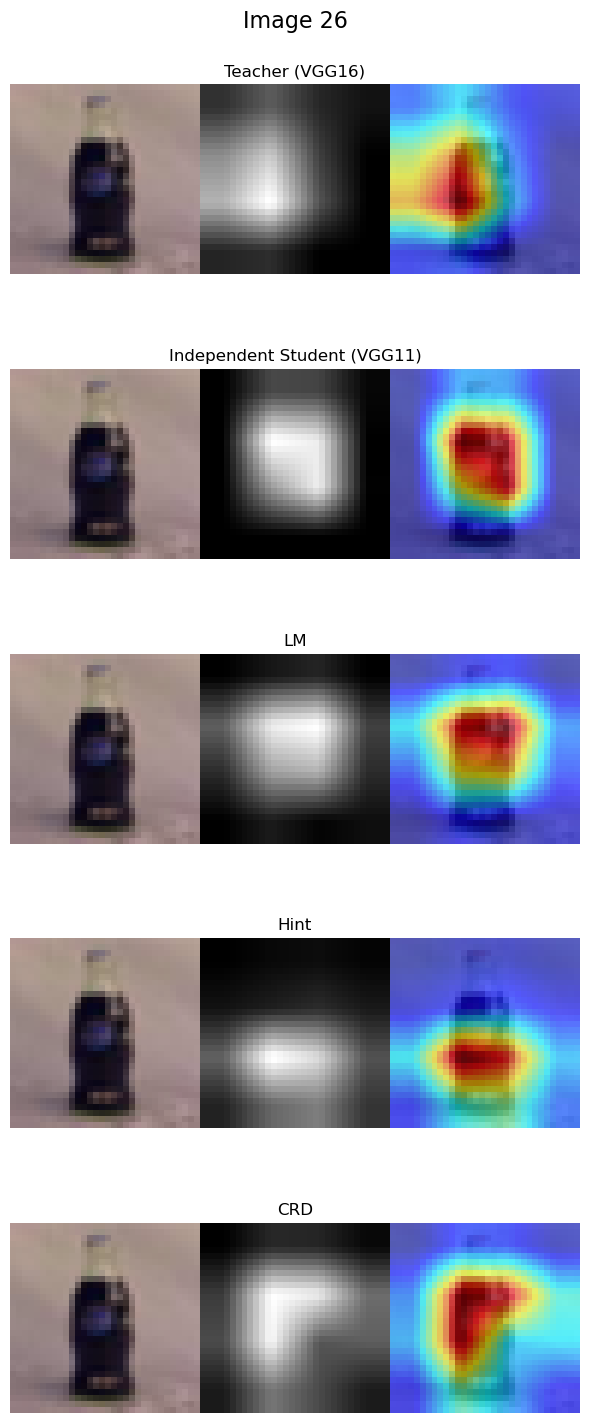

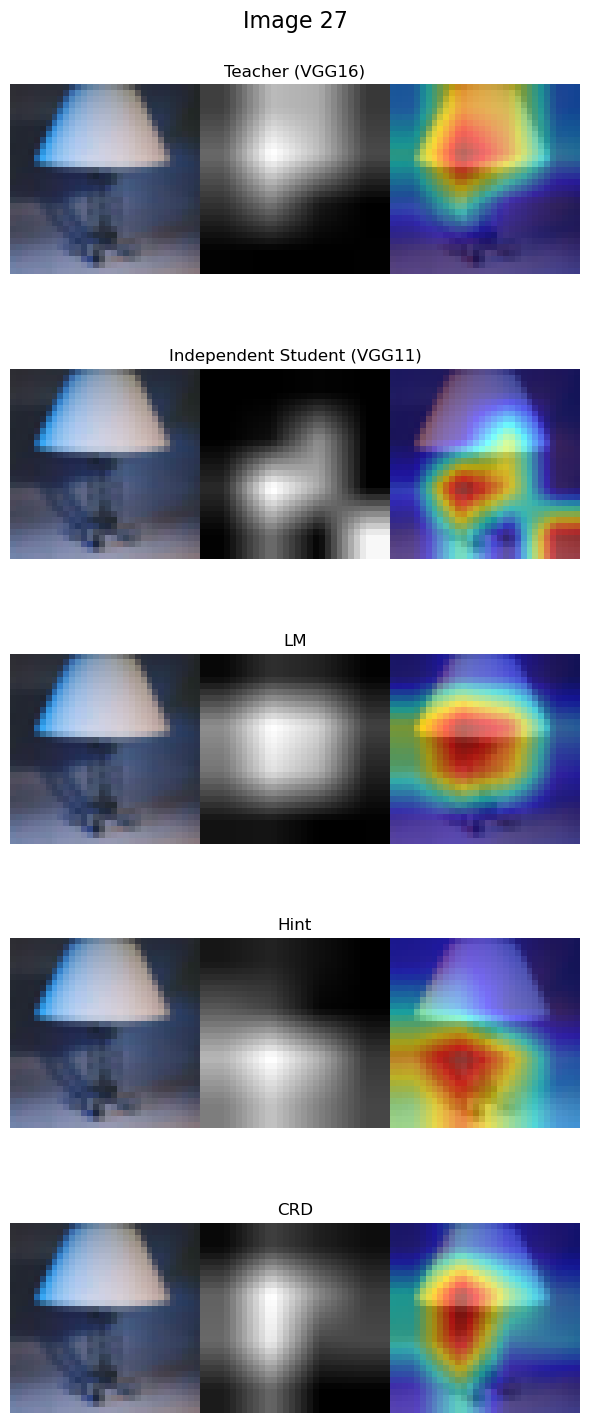

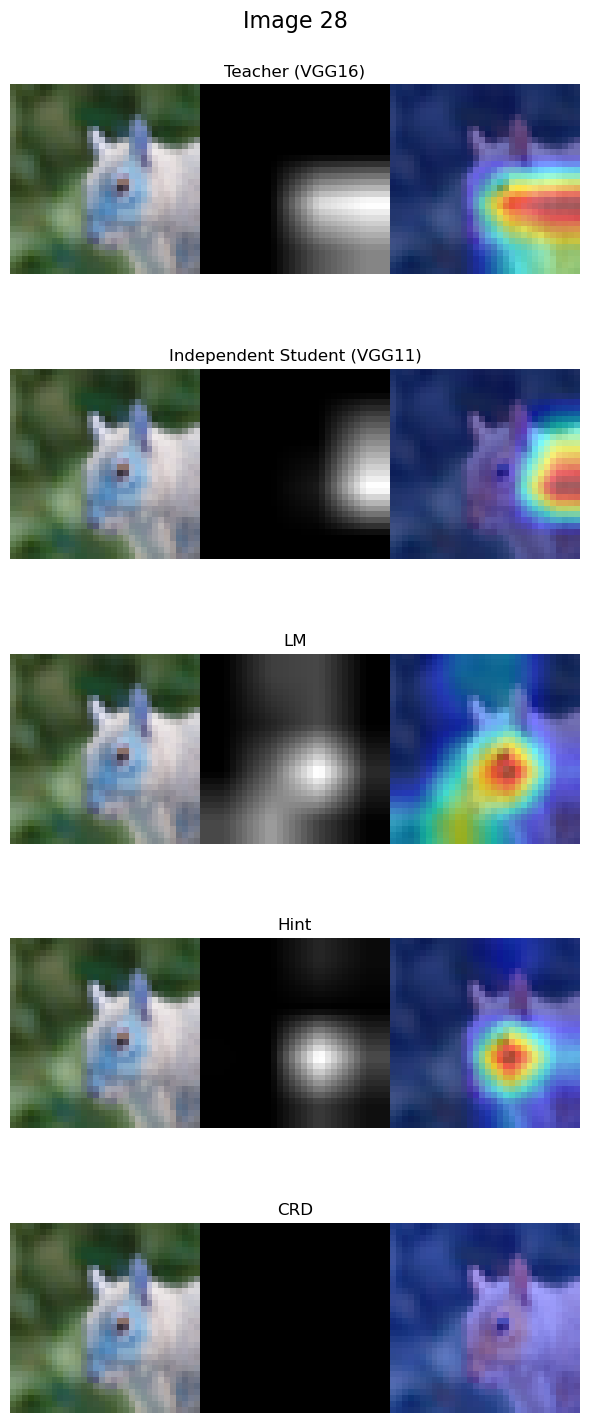

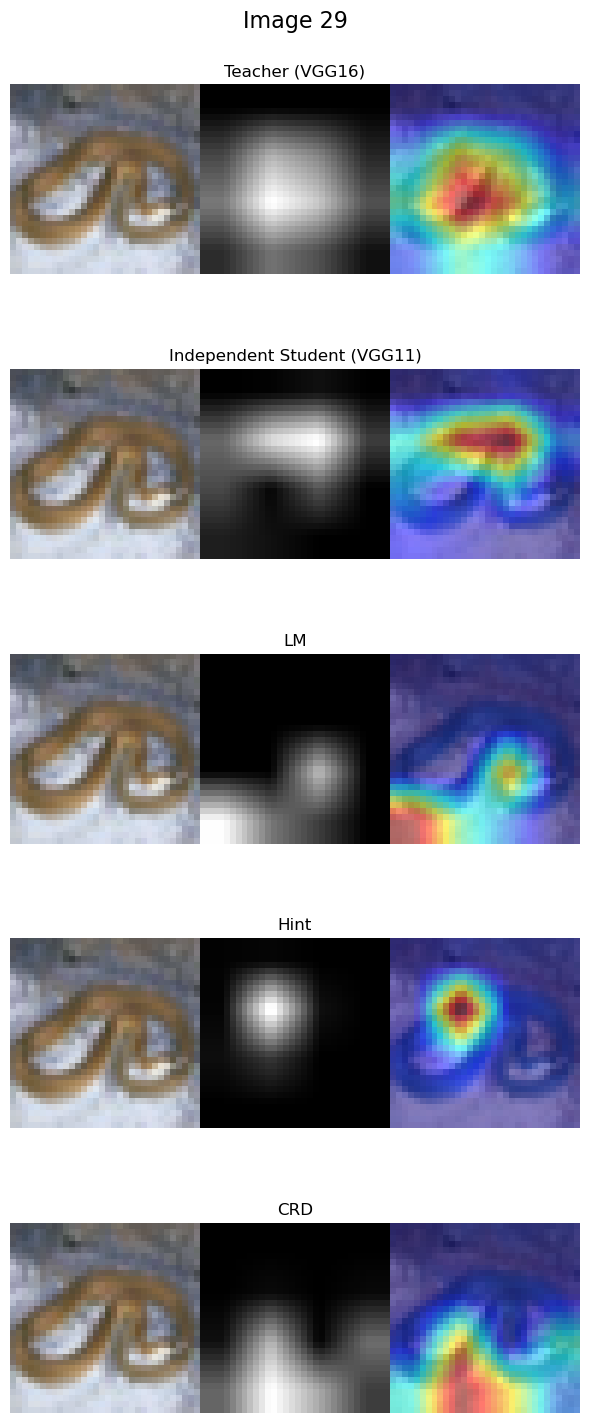

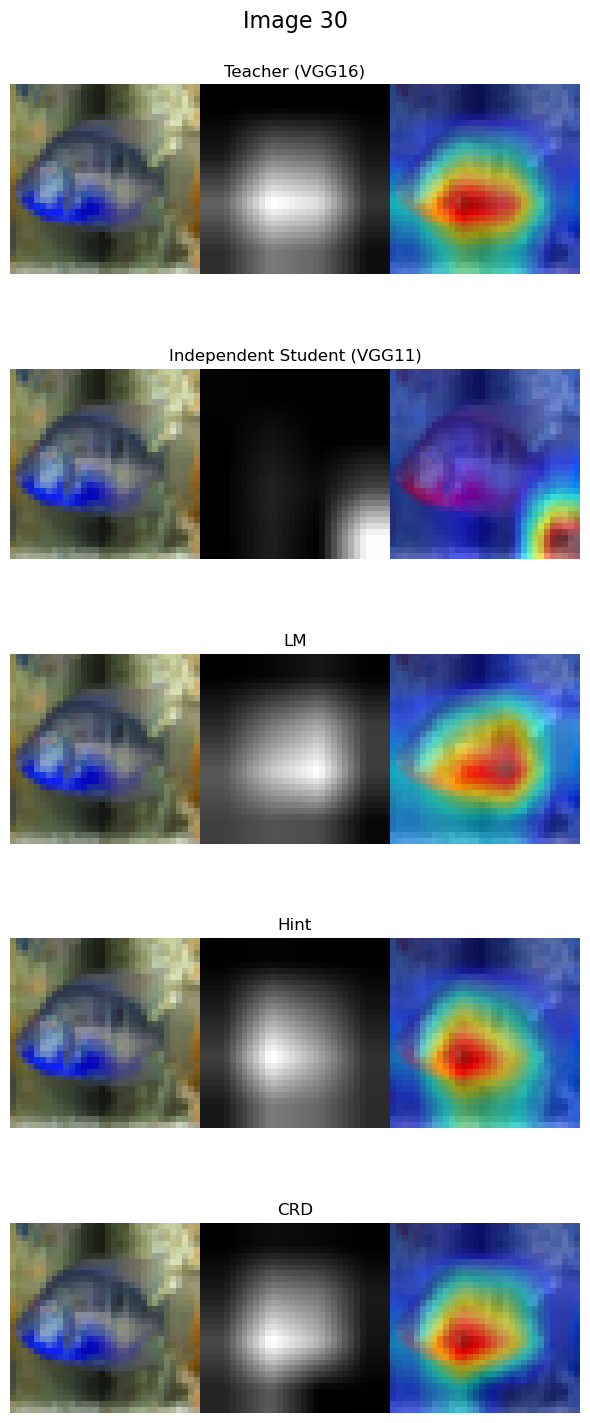

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have 5 lists of image arrays: s_crd_result, list2, list3, list4, list5
# Each list should have the same number of elements
num_images = len(s_crd_result)  # Number of images in each list

# Iterate over each index and create a subplot with 5 rows (one for each list) for each index
for i in range(num_images):
    fig, axes = plt.subplots(5, 1, figsize=(6, 15))  # 5 rows, 1 column for each image set
    fig.suptitle(f"Image {i + 1}", fontsize=16)
    
    # Display each list's image at index i in a subplot row
    axes[0].imshow(t_i_result[i])
    axes[0].set_title('Teacher (VGG16)')
    
    axes[1].imshow(s_i_result[i])
    axes[1].set_title('Independent Student (VGG11)')
    
    axes[2].imshow(s_lm_result[i])
    axes[2].set_title('LM')
    
    axes[3].imshow(s_hint_result[i])
    axes[3].set_title('Hint')
    
    axes[4].imshow(s_crd_result[i])
    axes[4].set_title('CRD')
    
    # Remove axis ticks for clarity
    for ax in axes:
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()


In [44]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def calculate_similarity_percentage(teacher_CAMS, distilled_CAMS, independent_CAMS):
    # Ensure inputs are numpy arrays for efficient computation
    teacher_CAMS = np.array([np.array(cam).sum(axis=-1).flatten() for cam in teacher_CAMS])
    distilled_CAMS = np.array([np.array(cam).sum(axis=-1).flatten() for cam in distilled_CAMS])
    independent_CAMS = np.array([np.array(cam).sum(axis=-1).flatten() for cam in independent_CAMS])
    
    count_more_similar = 0
    total_images = len(teacher_CAMS)
    
    for i in range(total_images):
        # Compute cosine similarities for teacher-distilled and teacher-independent pairs
        similarity_distilled = cosine_similarity([teacher_CAMS[i]], [distilled_CAMS[i]])[0, 0]
        similarity_independent = cosine_similarity([teacher_CAMS[i]], [independent_CAMS[i]])[0, 0]
        
        # Check if distilled is more similar to teacher than independent
        if similarity_distilled > similarity_independent:
            count_more_similar += 1
    
    # Calculate percentage
    percentage = (count_more_similar / total_images) * 100
    print("Average cosine similarity between teacher and distilled CAMs: ", np.mean([cosine_similarity([teacher_CAMS[i]], [distilled_CAMS[i]])[0, 0] for i in range(total_images)]))
    print("Average cosine similarity between teacher and independent CAMs: ", np.mean([cosine_similarity([teacher_CAMS[i]], [independent_CAMS[i]])[0, 0] for i in range(total_images)]))
    return percentage

# For this part we find the CAMS over the complete test set so we reuse the code from the previous cells, only with a slight modification (no need to index a certain subset of candidate images)

In [30]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
s_i = vgg11_bn_f(False,100).to(device)
s_i.load_state_dict(torch.load('vgg11_cifar100_student.pth'))
t = vgg16_bn_f(False,100).to(device)
t.load_state_dict(torch.load('teacher_model_vgg16_bn.pth'))
s_lm = vgg11_bn_f(False,100).to(device)
s_lm.load_state_dict(torch.load('vgg11_cifar100_blm.pth'))
s_hint = vgg11_bn_f(False,100).to(device)
s_hint.load_state_dict(torch.load('vgg11_cifar100_hint_student.pth'))
s_crd = vgg11_bn_f(False,100).to(device)
s_crd.load_state_dict(torch.load('vgg11_cifar100_crd_student.pth'))

C:\Users\PCF\AppData\Local\Temp\ipykernel_9992\2524539570.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  s_i.load_state_dict(torch.load('vgg11_cifar100_student.pth'))
C

<All keys matched successfully>

In [31]:
test = CIFAR100(root='./data', train=False, download=True)
def find_cams(model):
    model.eval()
    for param in model.parameters():
        param.requires_grad = True
    result = []
    for i in range(len(test)):
        image = test[i][0]
        label = test[i][1]
        original_image = np.array(image)
        original_image = np.float32(original_image) / 255
        rgb_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

        input_tensor = transform_test(rgb_image).unsqueeze(0)  # Add batch dimension

        # Choose the target class label
        target_label = label  # Replace with desired class index
        targets = [ClassifierOutputTarget(target_label)]
        target_layer = [model.block4[-1]]

        # Initialize Grad-CAM with the model and target layer
        cam = GradCAM(model=model, target_layers=target_layer)

        # Generate the Grad-CAM heatmap
        grayscale_cams = cam(input_tensor=input_tensor, targets=targets)
        cam_image = show_cam_on_image(original_image, grayscale_cams[0, :], use_rgb=True)  # First image in batch
        cam = np.uint8(255*grayscale_cams[0, :])
        cam = cv2.merge([cam, cam, cam])
        result.append(cam)
    return result

t_i_result = find_cams(t)
s_i_result = find_cams(s_i)
s_lm_result = find_cams(s_lm)
s_hint_result = find_cams(s_hint)
s_crd_result = find_cams(s_crd)

Files already downloaded and verified


In [ ]:
# Results with greater than or equal to
print("Percentage of images where the distilled model is more similar to the teacher than the independent student:")
print("Basic Logit Matching: ", calculate_similarity_percentage(t_i_result, s_lm_result, s_i_result))
print("Hint: ", calculate_similarity_percentage(t_i_result, s_hint_result, s_i_result))
print("CRD: ", calculate_similarity_percentage(t_i_result, s_crd_result, s_i_result))

Percentage of images where the distilled model is more similar to the teacher than the independent student:
Average cosine similarity between teacher and distilled CAMs:  0.3665484027436959
Average cosine similarity between teacher and independent CAMs:  0.31351204810785593
Basic Logit Matching:  69.03
Average cosine similarity between teacher and distilled CAMs:  0.3579792067981231
Average cosine similarity between teacher and independent CAMs:  0.31351204810785593
Hint:  67.84
Average cosine similarity between teacher and distilled CAMs:  0.36239617380365424
Average cosine similarity between teacher and independent CAMs:  0.31351204810785593
CRD:  69.61


In [45]:
# Results with STRICTLY greater than 
print("Percentage of images where the distilled model is more similar to the teacher than the independent student:")
print("Basic Logit Matching: ", calculate_similarity_percentage(t_i_result, s_lm_result, s_i_result))
print("Hint: ", calculate_similarity_percentage(t_i_result, s_hint_result, s_i_result))
print("CRD: ", calculate_similarity_percentage(t_i_result, s_crd_result, s_i_result))

Percentage of images where the distilled model is more similar to the teacher than the independent student:
Average cosine similarity between teacher and distilled CAMs:  0.3665484027436959
Average cosine similarity between teacher and independent CAMs:  0.31351204810785593
Basic Logit Matching:  46.11
Average cosine similarity between teacher and distilled CAMs:  0.3579792067981231
Average cosine similarity between teacher and independent CAMs:  0.31351204810785593
Hint:  44.379999999999995
Average cosine similarity between teacher and distilled CAMs:  0.36239617380365424
Average cosine similarity between teacher and independent CAMs:  0.31351204810785593
CRD:  45.36
